📤 Please upload the content image:


Saving 456.jpeg to 456 (1).jpeg
✅ Content Image: 456 (1).jpeg

📤 Please upload the style image:


Saving 123.jpeg to 123 (1).jpeg
✅ Style Image: 123 (1).jpeg
📷 Content Image:


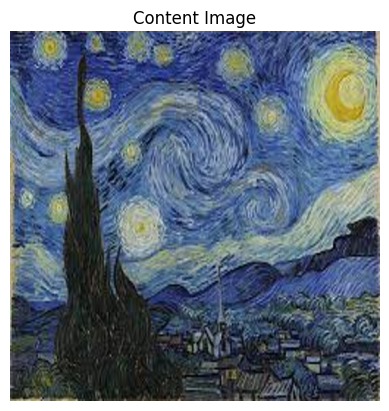

🎨 Style Image:


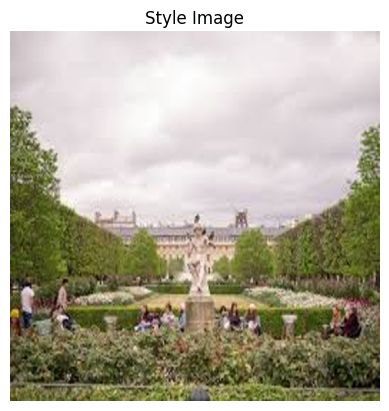

⏳ Loading the Neural Style Transfer Model...
✅ Model Loaded Successfully!
🎨 Applying Style Transfer...
✨ Stylized Image:


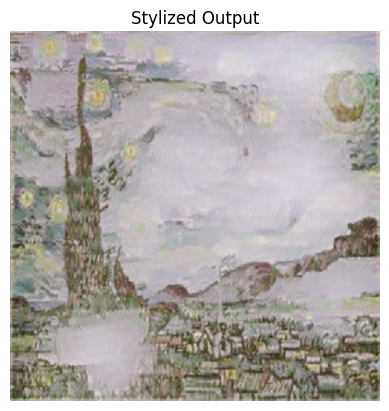

📥 Your stylized image is saved as 'stylized_image.jpg'. You can download it now.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
# Install necessary libraries (if not already installed)
!pip install tensorflow tensorflow_hub

# Import required libraries
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image
from google.colab import files
import os

from google.colab import files

from google.colab import files

# Step 1: Prompt the user to upload the content image
print("📤 Please upload the content image:")
uploaded_files_content = files.upload()  # Opens file selection window for content image

# Check if exactly one file (content image) is uploaded
if len(uploaded_files_content) == 1:
    content_image_path = list(uploaded_files_content.keys())[0]  # First uploaded file (content image)
    print(f"✅ Content Image: {content_image_path}")
else:
    print("⚠️ Please upload exactly one content image.")

# Step 2: Prompt the user to upload the style image
print("\n📤 Please upload the style image:")
uploaded_files_style = files.upload()  # Opens file selection window for style image

# Check if exactly one file (style image) is uploaded
if len(uploaded_files_style) == 1:
    style_image_path = list(uploaded_files_style.keys())[0]  # First uploaded file (style image)
    print(f"✅ Style Image: {style_image_path}")
else:
    print("⚠️ Please upload exactly one style image.")



# ================== 2️⃣ Load and Preprocess Images ==================
def load_image(image_path):
    """Load and preprocess an image for TensorFlow model."""
    img = PIL.Image.open(image_path)
    img = img.resize((512, 512))  # Resize for faster processing
    img = np.array(img)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = tf.image.convert_image_dtype(img, dtype=tf.float32)  # Normalize [0,1]
    return img

# Load the uploaded images
content_image = load_image(content_image_path)
style_image = load_image(style_image_path)

# Function to display images
def display_image(img, title="Image"):
    """Display an image using Matplotlib."""
    img = np.squeeze(img, axis=0)  # Remove batch dimension
    img = np.array(img * 255, dtype=np.uint8)  # Convert to uint8
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()

# Display the uploaded images
print("📷 Content Image:")
display_image(content_image, title="Content Image")

print("🎨 Style Image:")
display_image(style_image, title="Style Image")

# ================== 3️⃣ Load Pretrained Style Transfer Model ==================
print("⏳ Loading the Neural Style Transfer Model...")
hub_model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")
print("✅ Model Loaded Successfully!")

# ================== 4️⃣ Apply Style Transfer ==================
print("🎨 Applying Style Transfer...")

stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

# ================== 5️⃣ Display the Final Stylized Image ==================
print("✨ Stylized Image:")
display_image(stylized_image, title="Stylized Output")

# ================== 6️⃣ Save and Download the Result ==================
output_filename = "stylized_image.jpg"
tf.keras.preprocessing.image.save_img(output_filename, np.squeeze(stylized_image))

print(f"📥 Your stylized image is saved as '{output_filename}'. You can download it now.")

# Provide download link
files.download(output_filename)
